# Visualizing the Incorrect Predictions

In [11]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from skimage import color, transform, restoration, io, feature, filters
from sklearn.metrics import confusion_matrix
import numpy as np
np.set_printoptions(suppress=True)
import seaborn as sns
import os,sys
import glob
sys.path.append(os.path.abspath('..'))
from src.street_art_cnn import create_data_generators


In [12]:
def plot_confusion_matrix(generator, y_pred, class_labels):
    cm = confusion_matrix(generator.classes, y_pred)
    sns.set(font_scale=2.5)
    fig, ax = plt.subplots(figsize=(15,15))
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(class_labels); 
    ax.yaxis.set_ticklabels(class_labels);

    plt.show()

In [13]:
def calculate_y_correct(model, generator):
    
    #Getting y and yhat. Reseting generator to ensure consistent indexes
    generator.reset()
    y = generator.labels
    generator.reset()
    yhat = model.predict_generator(generator)

    #Changes yhat to class labels
    yhat_clean = np.zeros_like(yhat)
    yhat_clean[np.arange(len(yhat)), yhat.argmax(1)] = 1

    y_correct = []
    y_incorrect = []
    for i, v in enumerate(yhat_clean):
        
        if np.argmax(v) == y[i]:
            y_correct.append(True)
            y_incorrect.append(False)
            
        else:
            y_correct.append(False)
            y_incorrect.append(True)
    
    y_pred = np.argmax(yhat, axis=1)

    return y, yhat, y_correct, y_incorrect, y_pred

In [213]:
def plot_incorrect(generator, yhat,y,  y_incorrect, indx, num_classes):
    generator.reset()
    class_names = sorted(list(generator.class_indices.keys()))
    class_dict = {v: k for k, v in generator.class_indices.items()}

    for i in range(num_classes):
        print(class_names[i].capitalize() + ': ' + str(yhat[y_incorrect][indx][i]))
    actual = y[y_incorrect][indx]
    print("Actual - " + class_dict[actual].capitalize())
    
    files = np.asarray(generator.filepaths)
    img = io.imread(files[y_incorrect][indx])
    img = transform.resize(img, (150, 150))

    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show
    plt.imshow(img)
#     display_image_in_actual_size(files[y_incorrect][indx])

In [15]:
def display_image_in_actual_size(im_path):

    dpi = 80
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()



In [77]:
batch_size = 16
img_rows, img_cols = 100, 100

train_generator, test_generator, val_generator = create_data_generators(directory_path='../data/train_test_split/', 
                                                                    input_shape=(img_rows,img_cols), 
                                                                    batch_size=batch_size)

model = load_model('../models/5_class_model_best.h5')

y, yhat, y_correct, y_incorrect, y_pred = calculate_y_correct(model, test_generator)

Found 6263 images belonging to 5 classes.
Found 1565 images belonging to 5 classes.
Found 1965 images belonging to 5 classes.


In [202]:
for i in range(5):
    print(class_names[i].capitalize() + ': ' + str(yhat[y_incorrect][0][i]))

Wildstyle: 3.539653e-07
Bubble: 0.059740774
Stencil: 0.10228269
Realistic: 0.8379762
Cartoon: 2.6328363e-18


In [190]:
model.evaluate_generator(test_generator)

[1.8886691683844656, 0.59694654]

In [203]:
class_dict = {v: k for k, v in test_generator.class_indices.items()}
class_names = sorted(list(test_generator.class_indices.keys()))


In [197]:
sorted(class_names)

['bubble', 'cartoon', 'realistic', 'stencil', 'wildstyle']

Bubble: 0.84825987
Cartoon: 0.014182193
Realistic: 0.0004295028
Stencil: 0.13711786
Wildstyle: 1.0750198e-05
Actual - Stencil
[0.84825987 0.01418219 0.0004295  0.13711786 0.00001075]
3
{'wildstyle': 4, 'bubble': 0, 'stencil': 3, 'realistic': 2, 'cartoon': 1}


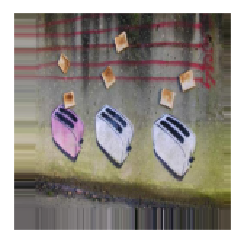

In [219]:
num = 651
plot_incorrect(test_generator, yhat,y, y_incorrect, indx=num, num_classes=5)
print(yhat[y_incorrect][num])
print(y[y_incorrect][num])
# k = model.predict_generator(val_generator)
# print(k[0])
# yhat_clean[np.arange(len(yhat)), yhat.argmax(1)] = 1
# yhat[0].argmax()
# print(y_incorrect)
print(test_generator.class_indices)

In [113]:
files = np.asarray(test_generator.filepaths)
files[y_incorrect][350]

'../data/train_test_split/test/cartoon/street_art_by_toma_c-3_-_paris_(france)6620.jpg'

In [41]:
files = np.asarray(val_generator.filepaths)
files[y_incorrect][15]

'../data/train_test_split/val/bubble/altered_0_2347.jpg'

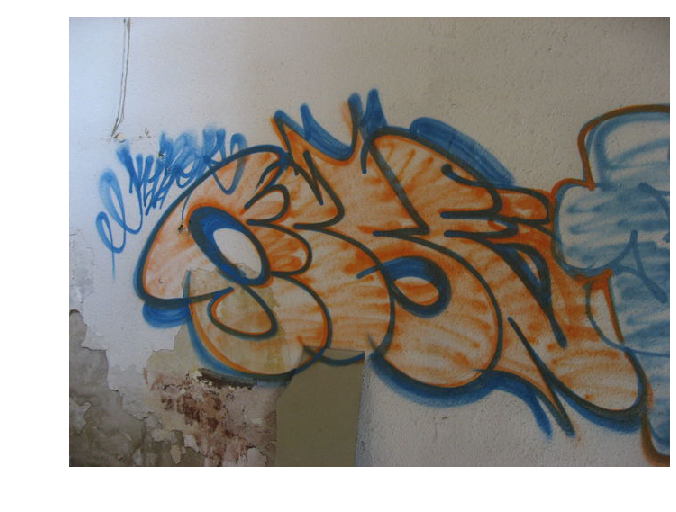

In [53]:
display_image_in_actual_size(files[y_incorrect][120])

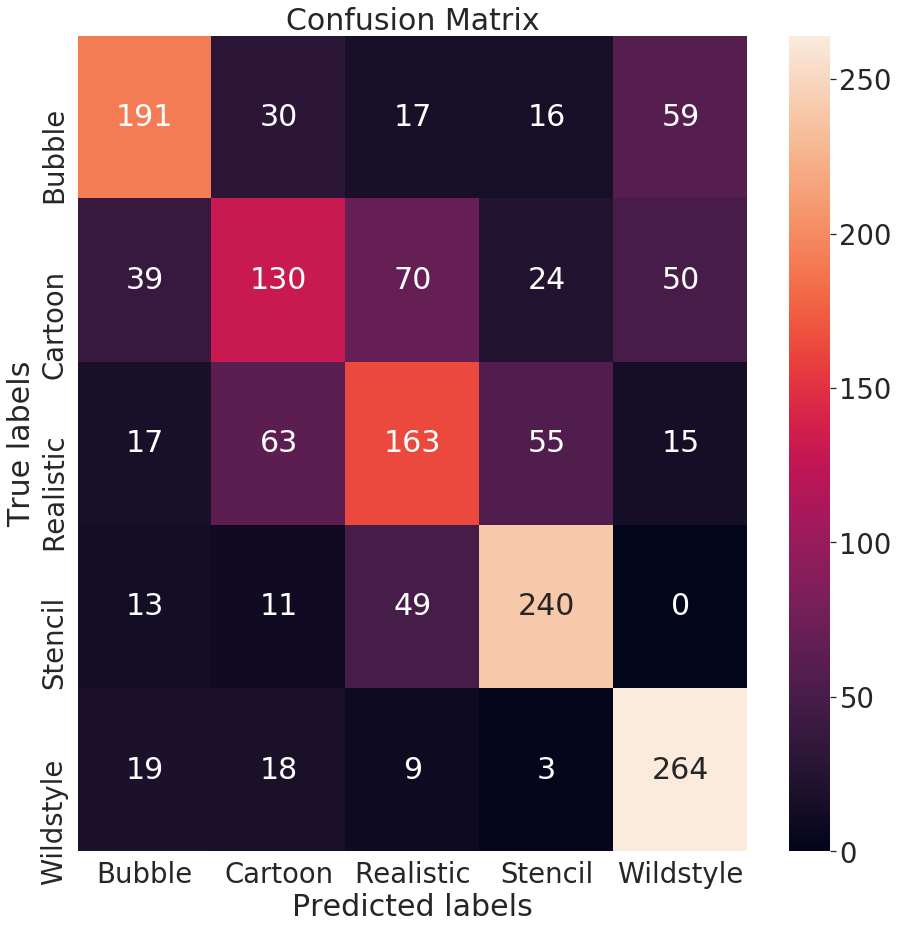

In [52]:
# class_labels = ['3D', 'Brush', 'Cartoon', 'Realistic', 'Wildstyle']
class_labels = ['Bubble', 'Cartoon', 'Realistic', 'Stencil', 'Wildstyle']
plot_confusion_matrix(val_generator, y_pred, class_labels)

In [ ]:
model.evaluate_generator(val_generator)

In [ ]:
my_img = io.imread("../images/my_images/wildstyle_skeleton.JPG")
my_img_resized = transform.resize(my_img, (100, 100))
# my_img = my_img_resized.reshape((1,) + my_img_resized.shape)
my_img_resized[:,:,0]

In [ ]:
my_img = io.imread("../images/my_images/wildstyle_skeleton.JPG")

my_img.shape

In [ ]:
plt.imshow(my_img_resized)

In [ ]:
predictions = model.predict(my_img)
for i in predictions[0]:
    print("%.3f" % i)

In [ ]:
test_generator.class_indices

In [12]:
def resize(file):
    img = io.imread(file)
    out = transform.resize(img, (100, 100), anti_aliasing=True)
    return out

def plot_avg_picture(folder, img_cols, img_rows):
    # picture_list = []
#     picture_list = [file for file in glob.glob(folder_names + "/*")]
    # for file in glob.glob(folder_names + "/*"): 
    #     picture_list.append(io.imread(file))
    d_name = '../data/img_resized_for_six/'
    picture_list=[]

    for file in glob.glob(d_name + folder + "/*"):
        formatted = resize(file)
        picture_list.append(formatted)
    # Assuming all images are the same size, get dimensions of first image
    w = img_cols 
    h = img_rows
    N=len(picture_list)

    # Create a numpy array of floats to store the average (assume RGB images)
    arr=np.zeros((h,w,3),np.float)
#     print(arr)
    # Build up average pixel intensities, casting each image as an array of floats
    for img in picture_list:
        try:
            imarr=np.array(img)
        #         print(imarr)
            arr=arr+imarr/N
        except:
            continue
    # Round values in array and cast as 8-bit integer
    arr=np.array(np.round(arr),dtype=np.uint8)

    # Generate, save and preview final image
    plt.imshow(arr)

In [ ]:
plot_avg_picture('bubble', 100, 100)

# Plots the Average Image for a Class

In [13]:
import os, numpy, PIL
from PIL import Image
def plotting_average_images(folder):
    """
    Assumes that every image is the same size. Takes the average at each pixel and generates a new image.
    Very cool effect with a couple of images. Turns into a gray blob with all the images. Not useful to the 
    project, but fun to see.
    """
    d_name = '../data/img_test/test'
    imlist= [file for file in glob.glob(folder +"/*")]

    # Assuming all images are the same size, get dimensions of first image
    w,h=Image.open(imlist[0]).size
    N=len(imlist)

    # Create a numpy array of floats to store the average (assume RGB images)
    arr=numpy.zeros((h,w,3),numpy.float)

    # Build up average pixel intensities, casting each image as an array of floats
    for im in imlist:
        try:
            imarr=numpy.array(Image.open(im),dtype=numpy.float)
            arr=arr+imarr/N
        except:
            continue

    # Round values in array and cast as 8-bit integer
    arr=numpy.array(numpy.round(arr),dtype=numpy.uint8)

    # Generate, save and preview final image
    out=Image.fromarray(arr,mode="RGB")
    out.save("Average.png")


# Color Palette by Class

In [311]:
def color_palette_by_class(classes, savename):
    colors = []
    for file in classes:
        path = '../images/class_colors/10_dominate_colors/' + file + '.jpg' 
        
        img = io.imread(path)
        img_resized = transform.resize(img, (300,300))

        pixel_list = [img_resized[irow][icol] for irow in range(nrow) for icol in range(ncol)]

        kmeans_img = KMeans(n_clusters=10).fit(pixel_list)  # looking for the 3 dominant colors
        img_cluster_centers = kmeans_img.cluster_centers_ 
        colors.append(img_cluster_centers.reshape(1,10,3))

    fig, axs = plt.subplots(1,5, figsize=(20,20))
    fig.suptitle("Colors by Classes", fontsize=36, y=.6)
    plt.tight_layout()
    for i, ax in enumerate(axs.flat):
        ax.grid(False)
        ax.axis('off')
        ax.imshow(colors[i])
        ax.set_title(classes[i].capitalize(), fontsize=24)
    plt.savefig(savename)

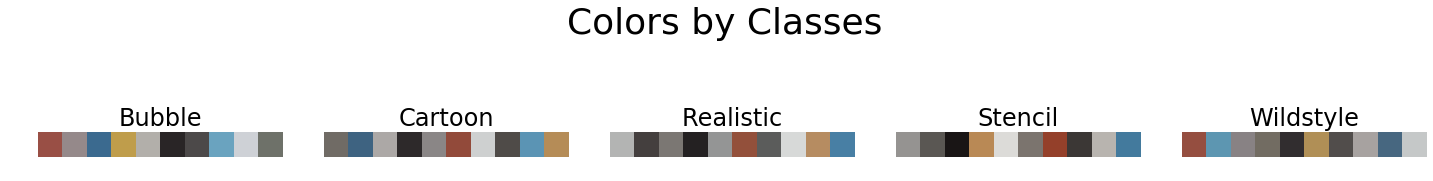

In [312]:
classes = ['bubble', 'cartoon', 'realistic', 'stencil', 'wildstyle']
color_palette_by_class(classes, 'Colors by Classes.jpg')

In [14]:
from skimage import color, transform, restoration, io, feature, filters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
realistic_test = io.imread('../data/backup_images/realistic/characters_by_adnate_-_melbourne_(australia)1329.jpg')
plt.imshow(realistic_test)

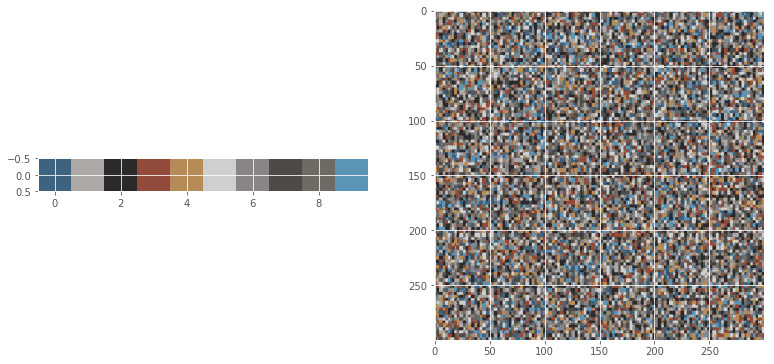

In [159]:
# def find_dominant_colors(file):
realistic_test = io.imread('cartoon.jpg')#../data/backup_images/realistic/characters_by_adnate_-_melbourne_(australia)5023.jpg')
realistic_resized = transform.resize(realistic_test, (300,300))

nrow, ncol, depth = realistic_resized.shape 
lst_of_pixels = [realistic_resized[irow][icol] for irow in range(nrow) for icol in range(ncol)]

kmeans_realistic = KMeans(n_clusters=10).fit(lst_of_pixels)  # looking for the 3 dominant colors
realistic_cluster_centers = kmeans_realistic.cluster_centers_ 
# colors_reshape = colors.reshape(1,3,3)

kmeans_realistic_color_mapped = np.array(list(map(lambda x: realistic_cluster_centers[x], kmeans_realistic.labels_))).reshape(300, 300, 3)
fig, axs = plt.subplots(1, 2, figsize=(13, 13))
ax.axis('off')
axs[0].imshow(realistic_cluster_centers.reshape(1, 10, 3))
axs[1].imshow(kmeans_realistic_color_mapped)

In [ ]:
test2 = realistic_cluster_centers#.reshape(1, 3, 3)

In [ ]:
plt.imshow(realistic_cluster_centers[2].reshape(1,1,3))

In [ ]:
what = np.append(test,test2, axis=0)

In [ ]:
plt.imshow(what.reshape(1,6,3))

# Graphing Dominant Colors by Class

In [182]:
def dominant_colors_by_classes(folder, num_clusters=10):
    picture_list = [resize(file) for file in glob.glob(folder +'/*')]

    for i, img in enumerate(picture_list):
        try:
            nrow, ncol, depth = img.shape 
            lst_of_pixels = [img[irow][icol] for irow in range(nrow) for icol in range(ncol)]

            kmeans_img = KMeans(n_clusters=num_clusters).fit(lst_of_pixels)  # looking for the 3 dominant colors
            cluster_centers = kmeans_img.cluster_centers_ 
            if i ==0:
                average_img = cluster_centers
            else:
                average_img = np.append(average_img,cluster_centers, axis=0)
        except:
             continue
    return average_img
def save_avg_dominate_color(arr, img_col, img_row, name):
    fig, ax = plt.subplots(figsize=(20,20), frameon=False)
    ax.grid(False)
    ax.axis('off')
    plt.imshow(arr.reshape(img_col, img_row, 3))
    plt.tight_layout()
    plt.savefig(name,bbox_inches = 'tight',pad_inches=0.0)

In [183]:
x = dominant_colors_by_classes('../data/img/realistic')

NameError: name 'resize' is not defined

In [180]:
x.shape
#stencil
# y = x[:-5]
# y.shape

#Cartoon
# y = x[:-10]
# y.shape

#Wildstyle
# y = x[:-10]
# y.shape

# Realistic
# y = x[:-10]
# y.shape

NameError: name 'x' is not defined

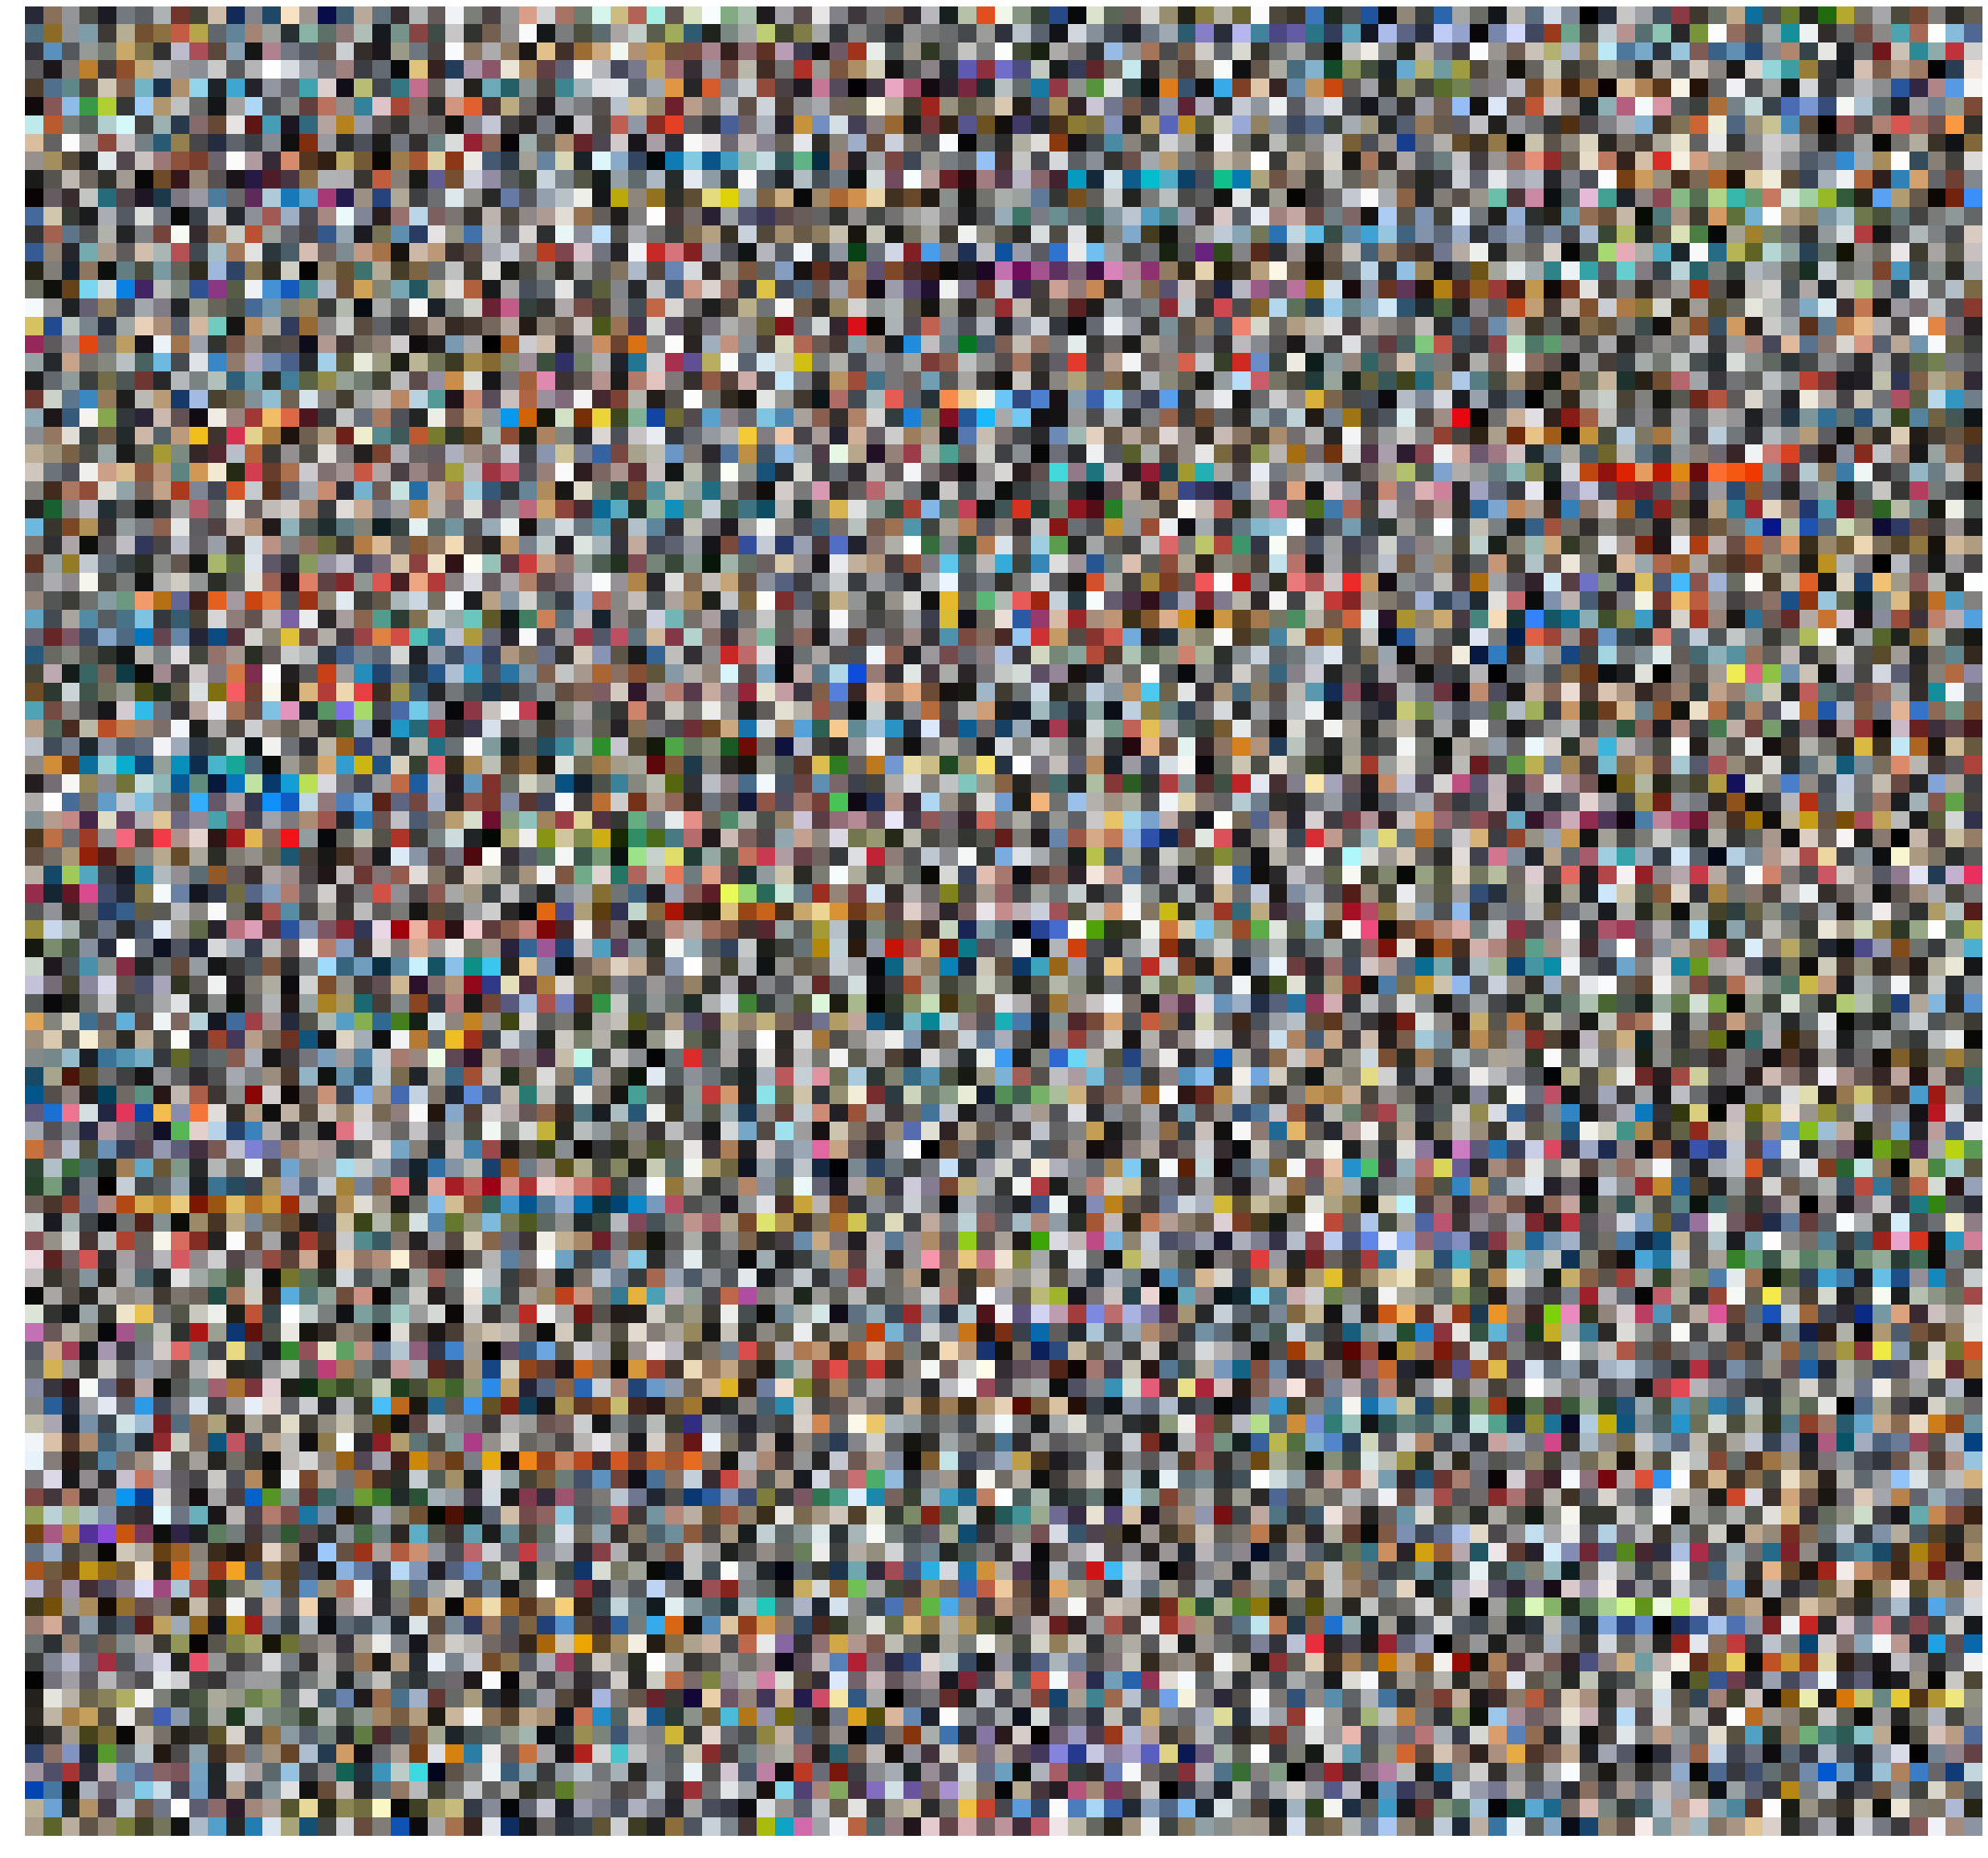

In [286]:
fig, ax = plt.subplots(figsize=(30,30), frameon=False)
ax.grid(False)
# ax.set_xticklabels([])
ax.axis('off')
plt.imshow(x.reshape(100, 107, 3))
plt.tight_layout()
plt.savefig('realistic.jpg',bbox_inches = 'tight',pad_inches=0.0)

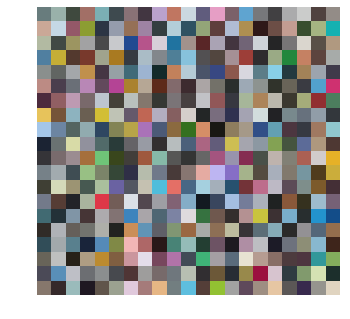

In [87]:
fig = plt.figure(frameon=False)
# fig.set_size_inches(w,h)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
fig.subplots_adjust(bottom = 0)
fig.subplots_adjust(top = 1)
fig.subplots_adjust(right = 1)
fig.subplots_adjust(left = 0)
plt.imshow(x.reshape(20, 21, 3))
fig.savefig('test.jpg')

In [40]:
x.reshape(3,-1)

array([[0.76163325, 0.73594722, 0.72636879, ..., 0.12331788, 0.09261832,
        0.09520151],
       [0.75055494, 0.7544265 , 0.76801848, ..., 0.75967566, 0.78339153,
        0.79340403],
       [0.26008203, 0.26223049, 0.24748386, ..., 0.69082556, 0.71178853,
        0.73524925]])

In [323]:
z = x[x[:,1].argsort()]
z.shape

(10700, 3)

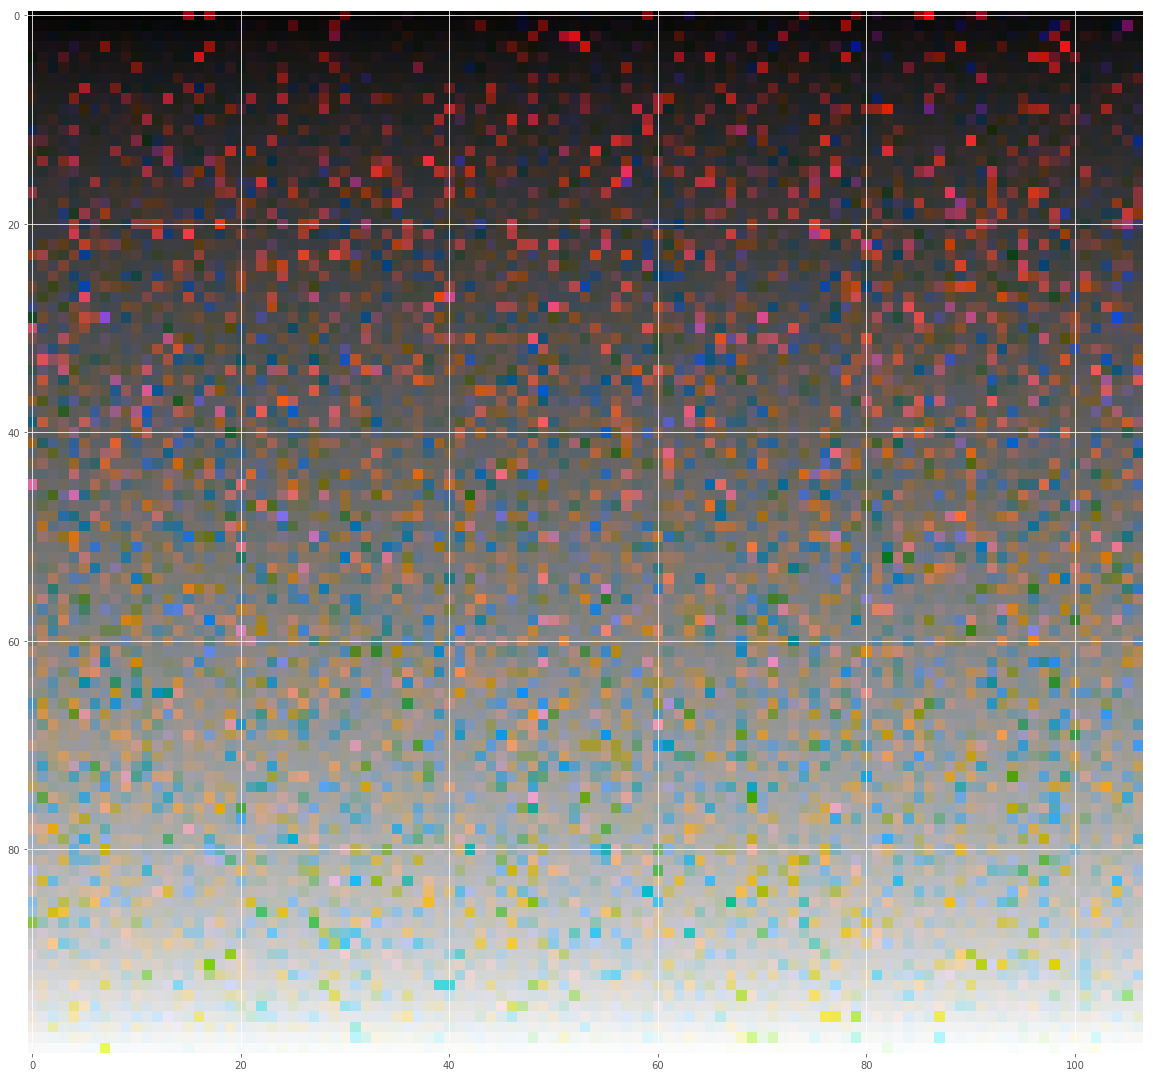

In [324]:
fig, ax = plt.subplots(figsize=(20,20))
plt.imshow(z.reshape(100, 107, 3))
plt.savefig('test.jpg')

In [330]:
import colorsys

In [334]:
r = x[0][0]
g = x[0][1]
b = x[0][1]

h, s, l = colorsys.rgb_to_hsv(r,g,b)
print(h)
print(r*255)
print(g*255)
print(b*255)

0.5
39.512679324894386
41.086919831223824
41.086919831223824


In [328]:
p = x[0] * 255 

In [359]:
from PIL import Image, ImageDraw
import colorsys



def make_rainbow_rgb(colors, width, height):
    """colors is an array of RGB tuples, with values between 0 and 255"""

    img = Image.new("RGBA", (width, height))
    canvas = ImageDraw.Draw(img)

    rainbow = sorted(colors)
    dx = width / float(len(colors)) 
    x = 0
    y = height / 2.0
    
    for rgb in rainbow:
        canvas.rectangle([(x, y), (x+dx, y+height)], fill=rgb)
        x += dx
    img.show()
make_rainbow_rgb(h_fixed, 100, 5)

SystemError: new style getargs format but argument is not a tuple

In [352]:
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
h,s,v = rgb2hsv(colors[:,0], colors[:,1], colors[:,2])

In [357]:
h_fixed = h*255
h_fixed

array([165.55971126,  20.41091222, 150.41128659, ..., 155.33145252,
        15.05226533, 155.06496847])

# Graphing Pixel Intensity by Class

In [268]:
def resize_and_recolor(file):
    img = io.imread(file)
    out = transform.resize(img, (100, 100), anti_aliasing=True)
    out = color.rgb2gray(out)
    out = np.ravel(out)
    return out

def pixel_intensity_by_class(folders, savename='pixel_intensity_by_class_test.jpg', img_dir = '../data/img/', color='ocean'):
    avg_image = []
    for folder in folders:
        picture_list = [resize_and_recolor(file) for file in glob.glob(img_dir + folder +'/*')]
        array = np.array(picture_list)
        avg_image.append(np.mean(array, axis=0).reshape(100,100))
        
    fig, axs = plt.subplots(1,5, figsize=(20,20))
    fig.suptitle("Pixel Intensity", fontsize=36, y=.63)
    plt.tight_layout()
    for i, ax in enumerate(axs.flat):
        ax.grid(False)
        ax.axis('off')
        ax.imshow(avg_image[i], cmap=color)
        ax.set_title(folders[i].capitalize(), fontsize=24)
    plt.savefig(savename)

/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


0:04:49.507160


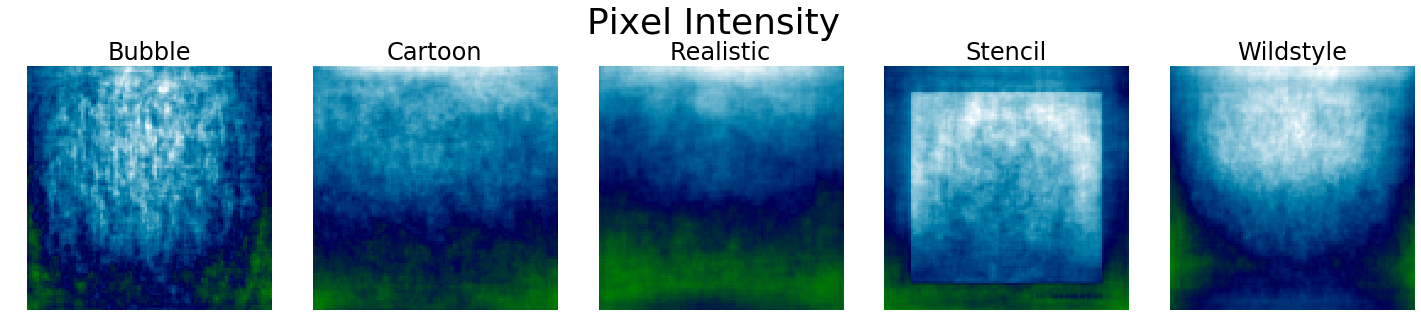

In [270]:
folders = ['bubble', 'cartoon', 'realistic', 'stencil', 'wildstyle']
pixel_intensity_by_class(folders, 'pixel_intensity_by_class.jpg','../data/img/')

In [ ]:
def color_palette_by_class(img_dir = '../images/class_colors/10_dominate_colors'):
    imlist= [file for file in glob.glob(folder +"/*")]
    
    fig, axs = plt.subplots(1,5, figsize=(20,20))
    fig.suptitle("Pixel Intensity", fontsize=36, y=.63)
    plt.tight_layout()
    for i, ax in enumerate(axs.flat):
        ax.grid(False)
        ax.axis('off')
        ax.imshow(avg_image[i], cmap=color)
        ax.set_title(folders[i].capitalize(), fontsize=24)
    plt.savefig(savename)

# Showing Encoded and Decoded Images Together

In [3]:
from tensorflow import keras
from tensorflow.keras.layers import Activation, Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, UpSampling2D
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import pickle
import numpy as np 
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import callbacks
from tensorflow import keras
from tensorflow.keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt

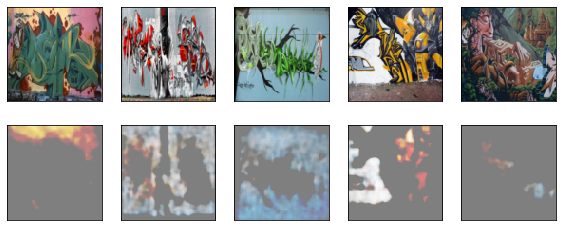

In [9]:
pickled_file='../data/training_img.pkl'
saved_model='../models/best_encoder_decoder.h5'
file_paths='data/file_paths_full.csv'
savename='encoded_dataframe.csv'

autoencoder = load_model(saved_model)

# Import data
with open(pickled_file, 'rb') as f:
    image_array = pickle.load(f)
train_data = np.array(image_array)
# df = pd.read_csv(file_paths)

#Accesses the encoder model inside the autoencoder model. Then runs a prediction
predictions = autoencoder.predict(train_data)


# Keras implementation results
plt.figure(figsize=(20, 4))
for i in range(5):
    # Original
    subplot = plt.subplot(2, 10, i + 1)
    plt.imshow(train_data[i])
    plt.gray()
    subplot.get_xaxis().set_visible(False)
    subplot.get_yaxis().set_visible(False)

    # Reconstruction
    subplot = plt.subplot(2, 10, i + 11)
    plt.imshow(predictions[i])
    plt.gray()
    subplot.get_xaxis().set_visible(False)
    subplot.get_yaxis().set_visible(False)
plt.savefig('results.png')